                                              0.0/13.3 MB ? eta -:--:--
                                              0.1/13.3 MB 1.3 MB/s eta 0:00:11
                                              0.1/13.3 MB 2.0 MB/s eta 0:00:07
                                              0.2/13.3 MB 1.5 MB/s eta 0:00:09
                                              0.2/13.3 MB 1.4 MB/s eta 0:00:10
                                              0.3/13.3 MB 1.4 MB/s eta 0:00:10
     -                                        0.3/13.3 MB 1.4 MB/s eta 0:00:10
     -                                        0.5/13.3 MB 1.5 MB/s eta 0:00:09
     -                                        0.5/13.3 MB 1.5 MB/s eta 0:00:09
     --                                       0.7/13.3 MB 1.7 MB/s eta 0:00:08
     --                                       0.8/13.3 MB 1.8 MB/s eta 0:00:07
     --                                       0.9/13.3 MB 1.9 MB/s eta 0:00:07
     ---                                      1.0/13.3 MB 1

19:52:17 - cmdstanpy - INFO - Chain [1] start processing
19:52:18 - cmdstanpy - INFO - Chain [1] done processing


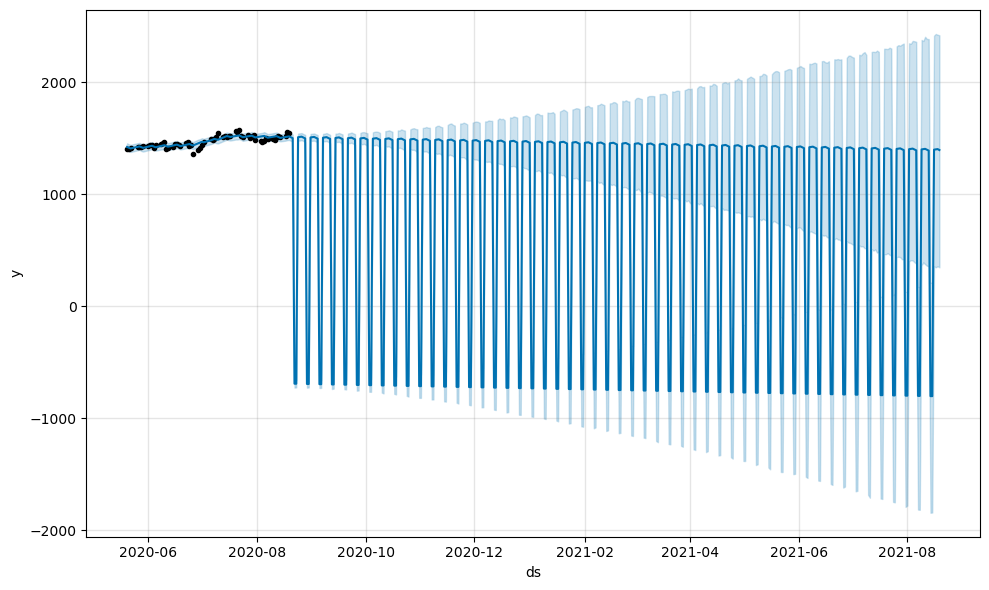

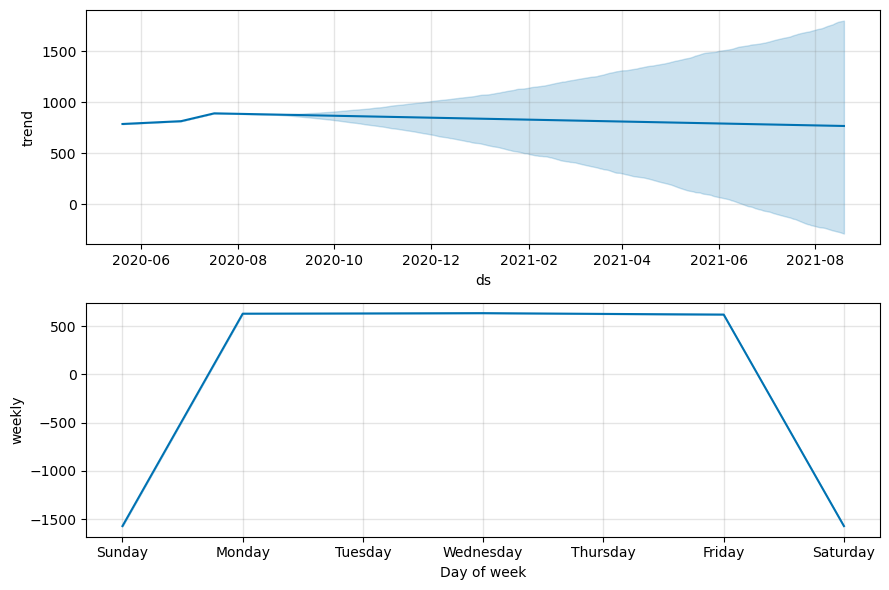

            ds         yhat   yhat_lower   yhat_upper
424 2021-08-15  -804.335315 -1843.199743   217.074336
425 2021-08-16  1396.588475   354.441191  2414.605779
426 2021-08-17  1398.810820   345.977960  2429.754482
427 2021-08-18  1401.604703   355.738728  2422.482021
428 2021-08-19  1393.375920   345.328625  2417.988499


In [1]:
# Install necessary libraries
!pip install pandas matplotlib prophet

# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

# Load Dataset (Replace with correct path if needed)
df = pd.read_csv("GOOG.csv")

# Display first few rows
print(df.head())

# Convert Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Rename columns to Prophet's format (ds = date, y = value to predict)
df = df[['Date', 'Close']]
df.columns = ['ds', 'y']

# Initialize Prophet Model
model = Prophet()

# Fit Model
model.fit(df)

# Create Future Dates for Prediction (365 days ahead)
future = model.make_future_dataframe(periods=365)

# Make Predictions
forecast = model.predict(future)

# Plot the Predictions
fig = model.plot(forecast)
plt.show()

# Plot Components (Trend, Weekly & Yearly Seasonality)
fig2 = model.plot_components(forecast)
plt.show()

# Display the Forecast Data
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

